<a href="https://colab.research.google.com/github/comparativechrono/Phase-oscillator-modelling-of-circadian-entrainment-in-transplanted-human-hearts/blob/main/Hearn_(2025)_Figure_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

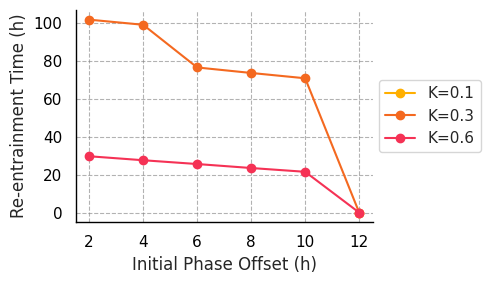

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns

# Shared setup
omega_H = 2 * np.pi / 24.0
phase_hours = np.array([2,4,6,8,10,12,14,16,18,20,22,24])
shift_hours = np.array([1.0,2.2,2.5,2.0,1.0,-0.2,-1.5,-2.8,-3.5,-3.0,-1.0,0.2])
phase_rad = phase_hours / 24 * 2 * np.pi
shift_rad = shift_hours / 24 * 2 * np.pi
interp_func = interp1d(phase_rad, shift_rad, kind='cubic', fill_value='extrapolate')

def Z(phi):
    return interp_func(phi % (2*np.pi))

Ks = np.linspace(0,1,30)
Dws = np.linspace(-0.2,0.2,30)
locked = np.zeros((len(Ks),len(Dws)))
for i,K in enumerate(Ks):
    for j,dW in enumerate(Dws):
        ts = np.linspace(0,150,1501)
        phi = 0.0
        for tv in ts:
            phi = (phi + (omega_H + K*Z(phi)*np.sin((omega_H+dW)*tv-phi))*(ts[1]-ts[0]))%(2*np.pi)
        # simple check
        locked[i,j] = abs(np.mod(phi,2*np.pi) - np.mod((omega_H+dW)*ts[-1],2*np.pi))<0.1



# Re‑entrainment
K_vals = [0.1, 0.3, 0.6]
psi0s  = np.linspace(0, 2*np.pi, 13)
tol    = 0.05

colors = ['#ffaf00', '#f46920', '#f53255']

sns.set_theme(style="whitegrid", rc={
        "grid.linestyle": "--",
        "grid.linewidth": 0.8,
        "grid.color": "gray",
        "grid.alpha": 0.6,
        "axes.edgecolor": "black",
        "axes.linewidth": 1.0,
        "xtick.color": "black",
        "ytick.color": "black",
    })

fig, ax = plt.subplots(figsize=(6,3))

for K, col in zip(K_vals, colors):
    times = []
    Delta = np.mean((omega_H*ts - phi) % (2*np.pi))
    for psi in psi0s:
        ts2 = np.linspace(0,200,2001)
        phv = 0
        lock = np.nan
        for tv in ts2:
            phv = (phv + (omega_H + K*Z(phv)*np.sin(omega_H*tv+psi-phv))*(ts2[1]-ts2[0]))%(2*np.pi)
            err = ((omega_H*tv+psi-phv)-Delta+np.pi)%(2*np.pi)-np.pi
            if abs(err)<tol and np.isnan(lock):
                lock = tv
        times.append(lock)

    ax.plot(
        psi0s/(2*np.pi)*24,
        times,
        marker='o',
        color=col,
        label=f'K={K}'
    )

ax.set_xlabel('Initial Phase Offset (h)')
ax.set_ylabel('Re-entrainment Time (h)')

ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

sns.despine(ax=ax)

fig.tight_layout(rect=[0, 0, 0.85, 1])

fig.savefig('Figure_5.png', dpi=300, bbox_inches='tight')
plt.show()
